## Statistical Analysis of birds of species Geospiza Scandens over the years (1975 & 2012)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('paper')

In [2]:
beaks_1975=pd.read_csv('Datasets/finch_beaks_1975.csv')
beaks_2012=pd.read_csv('Datasets/finch_beaks_2012.csv')
print(beaks_1975.head())
print(beaks_2012.head())

   band species  Beak length, mm  Beak depth, mm
0     2  fortis              9.4             8.0
1     9  fortis              9.2             8.3
2    12  fortis              9.5             7.5
3    15  fortis              9.5             8.0
4   305  fortis             11.5             9.9
    band species  blength  bdepth
0  19022  fortis     10.0     8.5
1  19028  fortis     12.5     8.9
2  19032  fortis      9.3     7.5
3  19041  fortis     10.3     9.6
4  19044  fortis     11.0     9.2


In [3]:
beaks_1975.rename(columns={'Beak length, mm':'blength','Beak depth, mm':'bdepth'},inplace=True)

beaks_1975['year']=[1975]*len(beaks_1975)
beaks_2012['year']=[2012]*len(beaks_2012)
beaks_comb=pd.concat((beaks_1975,beaks_2012))

### Exploratory Data Analysis of beak depth of the species Geospiza Scandens over the years

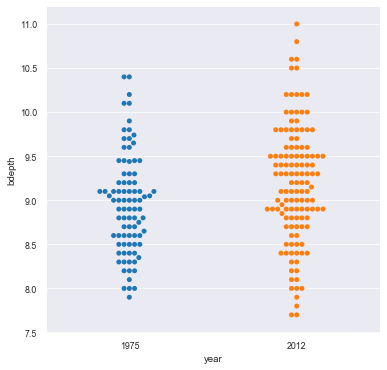

In [4]:
sns.swarmplot(x='year',y='bdepth',data=beaks_comb[beaks_comb['species']=='scandens'])
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

##### In 2012, the mean and variance of the species seem to have increased compared to 1975

In [5]:
#Function to Calculate the Emperical Cumalative Distribution Function (ECDF) of a parameter

def ecdf(data):
    x=np.sort(data)
    y=np.arange(1,len(data)+1)/len(data)
    return x,y

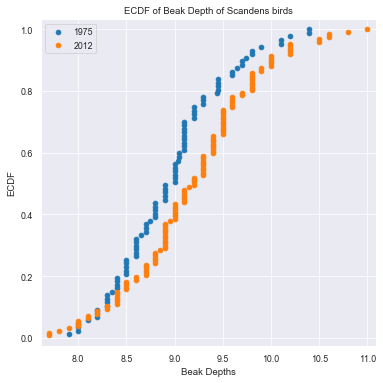

In [6]:
bd_1975=np.array(beaks_comb[(beaks_comb['year']==1975) & (beaks_comb['species']=='scandens')]['bdepth'])
bd_2012=np.array(beaks_comb[(beaks_comb['year']==2012) & (beaks_comb['species']=='scandens')]['bdepth'])

x_1975,y_1975=ecdf(bd_1975)
x_2012,y_2012=ecdf(bd_2012)

_=plt.scatter(x=x_1975,y=y_1975)
_=plt.scatter(x=x_2012,y=y_2012)

plt.title("ECDF of Beak Depth of Scandens birds")
plt.xlabel("Beak Depths")
plt.ylabel("ECDF")
plt.legend(('1975','2012'))
plt.margins(0.02)
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

##### The Emperical Cumalative Distribution Function (ECDF) shows the spread of beak depths in 1975 and 2012

In [7]:
# To find 95% Confidence Interval of the difference of beak depths, create a functions to generate bootstrap 
# samples and bootstrap replicates

def gen_bs_replicates(data, func, size=1):
    bs_replicates=np.empty(size)
    
    for i in range(size):
        bs_replicates[i]=func(np.random.choice(data,len(data)))
    return bs_replicates

In [8]:
#Observed difference in mean of beak depths in 1975 & 2012
diff_obs = np.mean(bd_2012) - np.mean(bd_1975)

#Bootstrapped difference by simulating 10,000 times
bs_rep_bd1975=gen_bs_replicates(bd_1975,np.mean,10000)
bs_rep_bd2012=gen_bs_replicates(bd_2012,np.mean,10000)

diff_bs = bs_rep_bd2012 - bs_rep_bd1975
ci=np.percentile(diff_bs,[2.5,97.5])

print("The observed difference in mean of beak depths in 1975 & 2012 is",round(diff_obs,6),"mm")
print("The 95% Confidence Interval of the mean difference is", ci[0],"to",ci[1],"mm")

The observed difference in mean of beak depths in 1975 & 2012 is 0.22622 mm
The 95% Confidence Interval of the mean difference is 0.059654199475063584 to 0.39217175762512296 mm


##### This is the 95% confidence interval of the mean difference of beak depths between 2012 & 1975

### Hypothesis Test : Beaks are deeper in 2012 than 1975?
#### Null Hypothesis : Mean Beak Depths are Equal in 2012 and 1975 

In [9]:
# To test the hypothesis that mean beak depths are equal, we create a normal distribution assuming beak depths are 
# equal in 1975 and 2012

comb_mean=np.mean(np.concatenate((bd_1975,bd_2012)))

# Shift the means of the two towards a combined mean to analyze under the assumption that the two means are equal
bd1975_shifted=bd_1975-np.mean(bd_1975)+comb_mean
bd2012_shifted=bd_2012-np.mean(bd_2012)+comb_mean

bs_rep_1975_shift=gen_bs_replicates(bd1975_shifted,np.mean,10000)
bs_rep_2012_shift=gen_bs_replicates(bd2012_shifted,np.mean,10000)
bs_diff_mean=bs_rep_2012_shift-bs_rep_1975_shift

p=np.sum((bs_diff_mean>=diff_obs))/len(bs_diff_mean)
print("The p value is",p)

The p value is 0.0037


##### The low p value of 0.0035 suggests that the difference in mean is statistically significant. The difference in mean is not by random chance.

#### Beaks are deeper in 2012 than 1975 by 0.22622 mm

### Exploratory Analysis of relationship between beak length and beak depth in 1975 & 2012

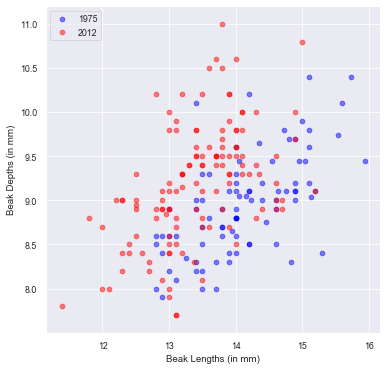

In [10]:
#Beak lengths subsetted
bl_1975=np.array(beaks_comb[(beaks_comb['year']==1975) & (beaks_comb['species']=='scandens')]['blength'])
bl_2012=np.array(beaks_comb[(beaks_comb['year']==2012) & (beaks_comb['species']=='scandens')]['blength'])

_=plt.scatter(bl_1975,bd_1975,color='blue',alpha=0.5)
_=plt.scatter(bl_2012,bd_2012,color='red',alpha=0.5)
plt.xlabel('Beak Lengths (in mm)')
plt.ylabel('Beak Depths (in mm)')
plt.legend(('1975','2012'),loc='upper left')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

##### The beak depths seem to have gotten deeper and lengths have fairly becomer shorter in 2012 compared to 1975

#### Linear Regression Slope and Intercepts of the two sets from 1975 & 2012

In [11]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    inds=np.arange(len(y))
    
    bs_slope_reps=np.empty(size)
    bs_intercept_reps=np.empty(size)
    
    for i in range(size):
        bs_inds=np.random.choice(inds,size=len(inds))
        bs_x,bs_y=x[bs_inds],y[bs_inds]
        bs_slope_reps[i],bs_intercept_reps[i]=np.polyfit(bs_x,bs_y,1)
    
    return bs_slope_reps, bs_intercept_reps


In [12]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33525491 0.59120158]
1975: intercept = 2.3908752365842267 conf int = [0.58261847 4.22508416]
2012: slope = 0.462630358835313 conf int = [0.32952394 0.59726067]
2012: intercept = 2.9772474982360198 conf int = [1.1476624  4.75637782]


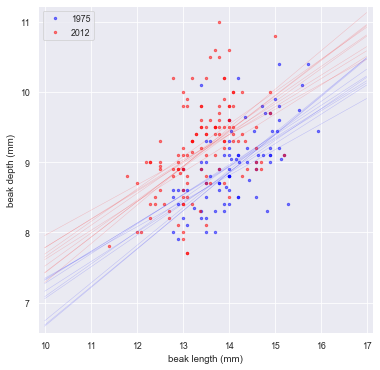

In [13]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.',linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(10):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.margins(0.02)
plt.show()

#### The slopes are very similar for 1975 & 2012, but the intercept of 2012 is higher than that of 1975. Again, suggests that the beak depths are generally larger in 2012 than 1975. 

### Exploratory Analysis of ratio of length to depth of beaks in 1975 & 2012

In [14]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = gen_bs_replicates(ratio_1975,np.mean,10000)
bs_replicates_2012 = gen_bs_replicates(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55696171 1.60098451]
2012: mean ratio = 1.4658342276847767 conf int = [1.44479431 1.4879603 ]


##### The mean ratios between the two years are different. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.